In [ ]:
import gym
import numpy as np 

In [ ]:
# 1. Load Environment and Q-table structure
env = gym.make("FrozenLake-v0", is_slippery=False)
Q = np.zeros([env.observation_space.n//2,env.action_space.n])
# env.obeservation.n, env.action_space.n gives number of states and action in env loaded
# 2. Parameters of Q-leanring
eta = .628
gma = .9
episode = 1000
rev_list = [] # rewards per episode calculate

In [ ]:
# 3. Q-learning Algorithm
time = []
if_win = []
test_rev_list = []
for i in range(episode):
    # Reset environment
    s = env.reset()
    info = env.step(env.action_space.sample())
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        #env.render()
        # Choose action from Q table
        a = np.argmax(Q[s//2,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state & reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s//2,a] = Q[s//2,a] + eta*(r + gma*np.max(Q[s1//2,:]) - Q[s//2,a])
        rAll += r
        s = s1
        j+=1
        if d == True:
            break
            time.append(j)
        time.append(j)
        
    rev_list.append(rAll)
    if_win.append(r)
    #env.render()
    if i%10==1:
        rAll = 0
        for episode in range(5):
            state = env.reset()
            step = 0
            done = False

            for step in range(99):
                #env.render()
                # Take the action (index) that have the maximum expected future reward given that state
                action = np.argmax(Q[s//2,:])

                new_state, reward, done, info = env.step(action)
                rAll += reward
                if done:
                    break
                state = new_state
        test_rev_list.append(rAll/5.0)
        




In [ ]:
print ("Reward Sum on all episodes %f"  %(sum(rev_list)/episode))
print ("Final Values Q-Table")
print (Q)

Reward Sum on all episodes 168.500000
Final Values Q-Table
[[ 0.          0.          6.25639766  0.        ]
 [ 0.          7.29        0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          8.1         0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          9.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.         10.          0.        ]]


In [ ]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(99):
        env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(Q[s//2,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            break
        state = new_state
env.close()

****************************************************
EPISODE  0

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF


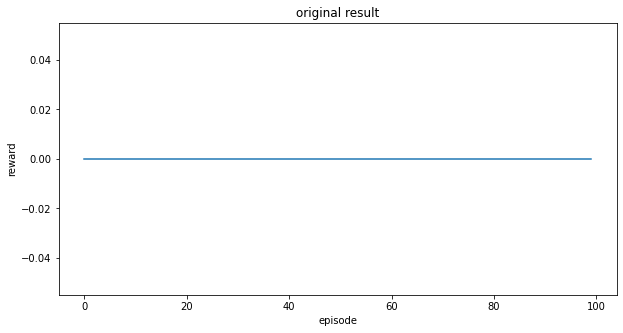

In [ ]:
import matplotlib.pyplot as plt

plt.figure(num = 3,figsize = (10,5))
plt.title("original result")
plt.xlabel("episode")
plt.ylabel("reward")
plt.plot(test_rev_list)
plt.show()